<span style="font-family:Papyrus; font-size:2.5em;">Generative Adversarial Networks (GANs)</span>
---
![](https://espresso-jobs.com/conseils-carriere/wp-content/uploads/2019/05/monalisa.gif)
<br>

# Introduction

- Generative Adversarial Networks (GANs)
- How GANs Work
- GANs Process
- Examples

### Generative Adversarial Networks (GANs)

Generative Adversarial Networks are used to generate images that never existed before. They learn about the world (objects, animals and so forth) and create new versions of those images that never existed.

They have two components:

- A **Generator** - this creates the images.
- A **Discriminator** - this assesses the images and tells the generator if they are similar to what it has been trained on. These are based off real world examples.

When training the network, both the generator and discriminator start from scratch and learn together.

### How GANs Work


**G** for **Generative** - this is a model that takes an input as a random noise singal and then outputs an image.

![](https://camo.githubusercontent.com/a2c5a0db812c0ade199e5ccacf86c6cff4db1685/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f67656e657261746976652e706e67)

**A** for **Adversarial** - this is the discriminator, the opponent of the generator. This is capable of learning about objects, animals or other features specified. For example: if you supply it with pictures of dogs and non-dogs, it would be able to identify the difference between the two.

![](https://camo.githubusercontent.com/96c8ccb9a91b8789106c1b3dfc9d62dde9d3cbe1/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d6578616d706c652e706e67)

Using this example, once the discriminator has been trained, showing the discriminator a picture that isn't a dog it will return a 0. Whereas, if you show it a dog it will return a 1.

![](https://camo.githubusercontent.com/8b5978b05b5ab4cd9bfba4819a0f0e09a12c8068/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d73636f7265732e706e67)

**N** for **Network** - meaning the generator and discriminator are both neural networks.


### GANs Process

**Step 1** - we input a random noise signal into the generator. The generator creates some images which is used for training the discriminator. We provide the discriminator with some features/images we want it to learn and the discriminator outputs probabilities. These probabilities can be rather high as the discriminator has only just started being trained. The values are then assessed and identified. The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

![](https://camo.githubusercontent.com/a26a06e2437514df1bbd736480f06a86aabebef8/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d6469736372696d696e61746f722e706e67)

Next we train the generator. We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. The error is calculated and backpropagated through the generator and the weights are updated.

![](https://camo.githubusercontent.com/07a68fab0dbea632b29d6186e298a6c05333497c/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d67656e657261746f722e706e67)

**Step 2** - This is the same as step 1 but the generator and discriminator are trained a little more. Through backpropagation the generator understands its mistakes and starts to make them more like the feature.

This is created through a *Deconvolutional Neural Network*.

### Examples

**GANs** can be used for the following:

- Generating Images
- Image Modification
- Super Resolution
- Assisting Artists
- Photo-Realistic Images
- Speech Generation
- Face Ageing

<br>
**[It’s Training Cats and Dogs: NVIDIA Research Uses AI to Turn Cats Into Dogs, Lions and Tigers, Too](https://blogs.nvidia.com/blog/2018/04/15/nvidia-research-image-translation/)**
<img src="https://blogs.nvidia.com/wp-content/uploads/2018/04/cats-dogs-nvresearch1.png" height="700" width="500">
<br>
<img src="https://cdn-images-1.medium.com/max/800/1*HaExieykcOT5oI2_xKisrQ.png" height="700" width="500">


In [ ]:
import os
print(os.listdir("../input"))

**Importing the libraries**

In [ ]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

## Some dogs

> The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world.

In [ ]:
import shutil
shutil.unpack_archive("../input/all-dogs.zip", "/kaggle/working/")
import os
print(os.listdir("/kaggle/working/"))

PATH = '/kaggle/working/all-dogs/'
images = os.listdir(PATH)
print(len(images))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(images))
    img = plt.imread(PATH + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# https://www.kaggle.com/code/witold1/quick-data-explanation-and-eda/notebook
# https://www.kaggle.com/code/jesucristo/gan-introduction/notebook
# https://www.kaggle.com/c/generative-dog-images/discussion/97809#latest-564085
# https://machinelearning.wtf/terms/mode-collapse/
import pandas as pd 
import seaborn as sns
from collections import defaultdict

by_breeds_dict = defaultdict(list)

for breed_code_and_pict_indx in images:
    breed_code, pict_indx = breed_code_and_pict_indx.split('_')
    by_breeds_dict[breed_code].append(pict_indx) 
    
df = pd.DataFrame.from_dict(by_breeds_dict, orient='index').T
print(df.head())
print(df.shape)
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(121)
sns.boxplot(df.shape[0] - df.isnull().sum()) # minimum, first quartile, median, third quartile, and maximum
plt.xlabel('# of photos')
fig.add_subplot(122)
print(df.isnull().sum().head())
print(df.notnull().sum().head())

sns.distplot(df.shape[0] - df.isnull().sum())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Fréchet Inception Distance (FID) -> Inception network
# FID is more robust to noise than IS
# Mode collapse -> e.g. male faces -> or similar identical 
# catastrophic collapse or the Helvetica scenario
# A GAN is successfully trained when both of these goals are achieved:
#  If the model only generates one image per class, the distance will be high. So FID is a better measurement for image diversity.
# The generator can reliably generate data that fools the discriminator.
# The generator generates data samples that are as diverse as the distribution of the real-world data.

# If the generated images look similar to the real images on average, the precision is high. High recall implies the generator can generate any sample found in the training dataset.

# Insights

Check this posts:

>[Quick data explanation and EDA](https://www.kaggle.com/witold1/quick-data-explanation-and-eda) by @witold1

> [New Insights](https://www.kaggle.com/c/generative-dog-images/discussion/97863#latest-564673)

- There are pictures with more than one dog (even with  3  dogs);
- There are pictures with the dog (-s) and person (people);
- There are pictures with more than one person (even with  4  people);
- There are pictures where dogs occupy less than  1/5  of the picture;
- There are pictures with text (magazine covers, from dog shows, memes and pictures with text);
- Even wild predators included, e.g. African wild dog or Dingo, but not wolves.

**Examples**

<img src="https://i.ibb.co/cxZ3nwd/Captura-de-pantalla-de-2019-06-29-12-31-41.png" alt="Captura-de-pantalla-de-2019-06-29-12-31-41">
<img src="https://i.ibb.co/TRzg1JG/Captura-de-pantalla-de-2019-06-29-12-32-48.png" alt="Captura-de-pantalla-de-2019-06-29-12-32-48">
<img src="https://i.ibb.co/LNgrSTj/Captura-de-pantalla-de-2019-06-29-12-32-28.png" alt="Captura-de-pantalla-de-2019-06-29-12-32-28">
<img src="https://i.ibb.co/p1LBrz3/Captura-de-pantalla-de-2019-06-29-12-31-59.png" alt="Captura-de-pantalla-de-2019-06-29-12-31-59">



# Image Preprocessing
### Check: [GAN dogs starter](https://www.kaggle.com/wendykan/gan-dogs-starter)

**Initial code ...**


In [ ]:
batch_size = 32
imageSize = 64 

transform = transforms.Compose([transforms.Resize(imageSize),
                                transforms.CenterCrop(imageSize),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                (0.5, 0.5, 0.5), 
                                (0.5, 0.5, 0.5))])

#PATH = '/kaggle/working/all-dogs/'
#images = os.listdir(PATH)
#print(images)

train_data = datasets.ImageFolder('/kaggle/working/', transform=transform)

dataloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

imgs, label = next(iter(dataloader))
print(imgs.shape)
imgs = imgs.numpy().transpose(0, 2, 3, 1)
print(imgs.shape)

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]


transform = transforms.Compose([transforms.Resize(imageSize),
                                transforms.CenterCrop(imageSize),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                (0.5, 0.5, 0.5), 
                                (0.5, 0.5, 0.5))])

#PATH = '/kaggle/working/all-dogs/'
#images = os.listdir(PATH)
#print(images)

train_data = datasets.ImageFolder('/kaggle/working/', transform=transform)

dataloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

imgs, label = next(iter(dataloader))
print(imgs.shape)
imgs = imgs.numpy().transpose(0, 2, 3, 1)
print(imgs.shape)

for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

**New data Data loader and Augmentations from [RaLSGAN dogs](https://www.kaggle.com/speedwagon/ralsgan-dogs)**

In [ ]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('/kaggle/working/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)
                                           
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

In [ ]:
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

# Weights
### Defining the weights_init function

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.2)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Generator

In [ ]:
class G(nn.Module):
    
    def __init__(self):
        super(G, self).__init__()
        
        self.generator = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
            nn.Tanh() # [-1, 1] Normalzied out -> mean 0 
        )
        
    def forward(self, input):
        out = self.generator(input) # [Batch, res, res, 3]
        return out
    
netG = G()
netG.apply(weights_init)

# Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False), # [Batch, res, res, 3]
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),   
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
            nn.Sigmoid() # Probs 
        )

    def forward(self, input):
        out = self.discriminator(input)
        
        return out.view(-1) # 1-d tensor
    
netD = Discriminator()
netD.apply(weights_init)

## Another setup

In [ ]:
class GeneratorA(nn.Module):
    
    def __init__(self, nz=128, channels=3):
        super(GeneratorA, self).__init__()
        self.nz = nz
        self.channels = channels
        
        def ConvBlock(n_i, n_o, k=4, s=2, p=0):
            
            block = [
                nn.ConvTranspose2d(n_i, n_o, k, s, p, bias=False),
                nn.BatchNorm2d(n_o),
                nn.ReLU(inplace=True),
            ]
            
            return block
        
        self.model = nn.Sequential(
            *ConvBlock(self.nz, 1024, 4, 1, 0), # [B, 128, 1, 1]
            *ConvBlock(1024, 512, 4, 2, 1),
            *ConvBlock(512, 256, 4, 2, 1),
            *ConvBlock(256, 128, 4, 2, 1),
            *ConvBlock(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh() # [B, 64, 64, 3]
        )
        
    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1) # [Batch, vector, 1, 1]
        img = self.model(z)
        return img # [Batch, res, res, 3]

g = GeneratorA()
print(g)

class DiscriminatorA(nn.Module):
    
    def __init__(self, channels=3):
        super(DiscriminatorA, self).__init__()
        self.channels = channels
        
        def ConvBlock(n_i, n_o, k=4, s=2, p=0, bn=False):
            block = [
                nn.Conv2d(n_i, n_o, k, s, p, bias=False)
            ]
            
            if bn:
                block.append(nn.BatchNorm2d(n_o))
            
            block.append(nn.LeakyReLU(0.2, inplace=True))
            
            return block
        
        self.model = nn.Sequential(
            *ConvBlock(self.channels, 32, 4, 2, 1),  # [B, 64, 64, 3]
            *ConvBlock(32, 64, 4, 2, 1),
            *ConvBlock(64, 128, 4, 2, 1, bn=True),
            *ConvBlock(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False), 
        )
        
    def forward(self, imgs): # [Batch, res, res, 3]
        logits = self.model(imgs)
        out = torch.sigmoid(logits)
    
        return out.view(-1, 1) # [Batch, 1]

d = DiscriminatorA()
print(d)


# Training

**My training baseline**

In [ ]:
!mkdir results
!ls

In [ ]:
EPOCH = 30 # play with me
LR = 0.001
criterion = nn.BCELoss() # Expects probs 
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

This doesn't run because EPOCH = 0, change it and try ;)

In [ ]:
netD = netD.cuda()
netG = netG.cuda()

for epoch in range(EPOCH):
    for i, data in enumerate(dataloader, 0):
        
        netD.zero_grad()
        # D -> real #
        real,_ = data
        real = real.cuda()
        input = Variable(real)
        input = input.cuda()
        target = Variable(torch.ones(input.size()[0])) # Real
        target = target.cuda()
        output = netD(input)
        errD_real = criterion(output, target)
        
        # D -> fake by g #
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1)) # Vector noise 
        noise = noise.cuda()
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0])) # Fake 
        target = target.cuda()
        output = netD(fake)
        errD_fake = criterion(output, target)
        
        # Backpropagating the total error
        errD = errD_real + errD_fake
        errD.backward(retain_graph=True)
        optimizerD.step()
        
        # Generator #
        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        target = target.cuda()
        fake = fake.cuda()
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()
        
        # 3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps
        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(dataloader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize=True)

# Best public training
- 06/29 [RaLSGAN dogs](https://www.kaggle.com/speedwagon/ralsgan-dogs) V9
- 06/29 this kernel V5
- some version of this kernel

### Parameters

In [58]:
batch_size = 32
lr_g = 0.001
lr_d = 0.0005

epochs = 20

real_label = 0.9
fake_label = 0
nz = 128 

device = torch.device("cuda")

netG = GeneratorA(nz).to(device)
netD = DiscriminatorA().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=lr_d, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr_d, betas=(0.5, 0.999))

# Generator noise #
#fixed_noise = torch.rand(25, nz, 1, 1, device=device)
G_losses = []
D_losses = []
epoch_time = []

### Initialize models and optimizers

In [67]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("g vs D loss - epoch " + str(epoch))
    plt.plot(G_losses, label="G")
    plt.plot(D_losses, label="G")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

**Plot Loss per EPOCH**
> plot_loss()

In [57]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_im = netG(noise).to("cpu").clone().detach().squeeze(0) # [64, 64 ,3]
        gen_im = gen_im = gen_im.numpy().transpose(1, 2, 0) # [64, 3, 64]
        sample.append(gen_im)
        
    figure, axes = plt.subplots(1, len(sample), figsize=(64, 64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)
        
    plt.show()
    plt.close()

**Show generated images**
> show_generated_img()

In [ ]:
# https://towardsdatascience.com/why-do-gans-need-so-much-noise-1eae6c0fb177#:~:text=In%20order%20to%20draw%20random,bit%20more%20nuanced%20than%20that.

### Training Loop

[1/20][322/644] Loss_D: 1.4283 Loss_G: 0.9277 D(x): 0.3415 D(G(z)): 0.2847 / 0.4037
[1/20][644/644] Loss_D: 0.9869 Loss_G: 1.6641 D(x): 0.5499 D(G(z)): 0.2885 / 0.1635


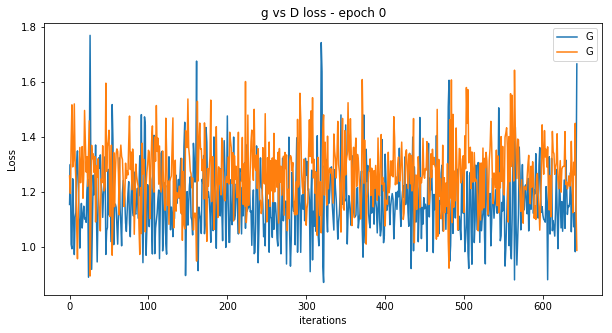

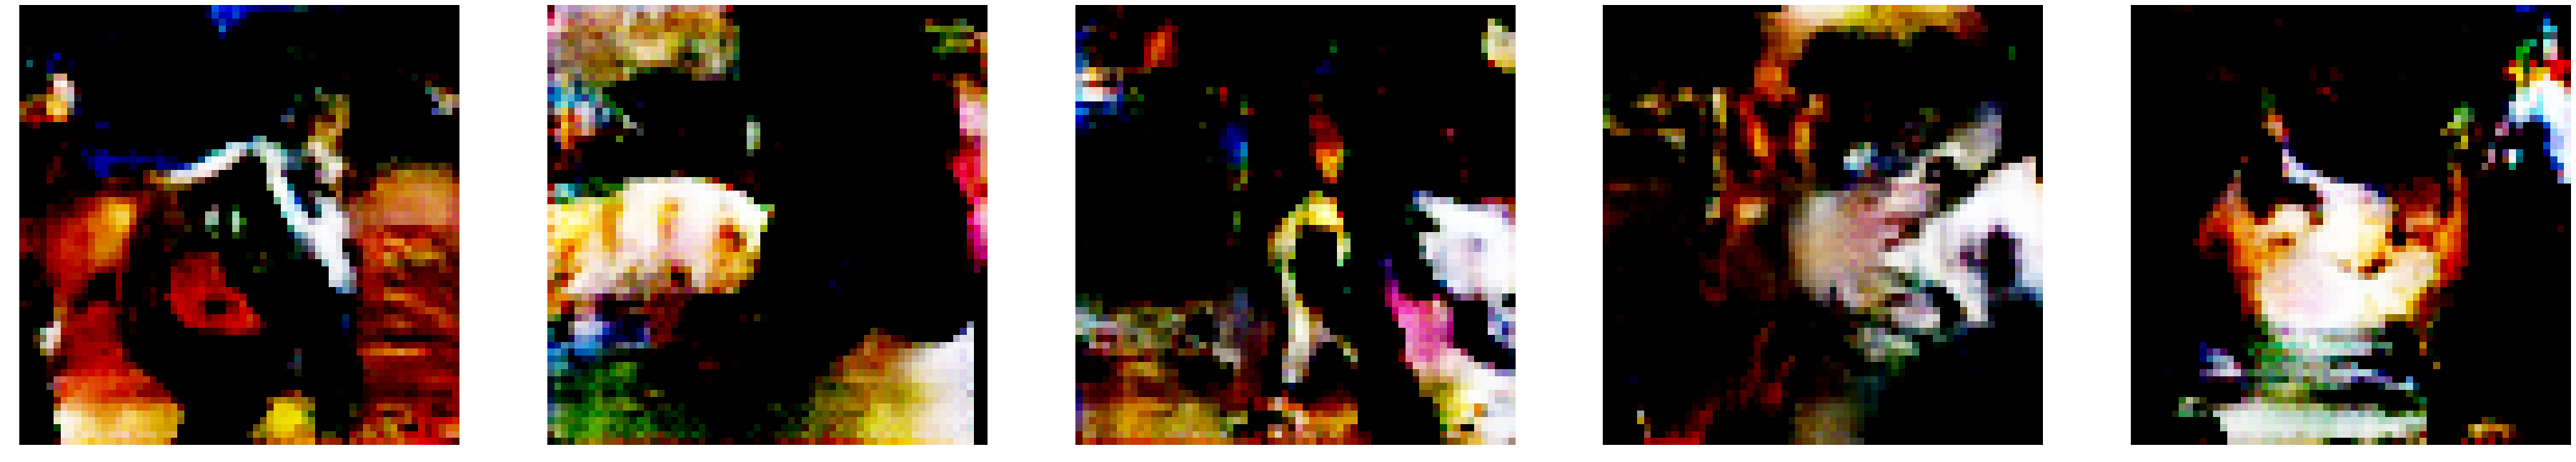

[2/20][322/644] Loss_D: 1.1277 Loss_G: 1.2643 D(x): 0.5272 D(G(z)): 0.3466 / 0.2673
[2/20][644/644] Loss_D: 1.3765 Loss_G: 1.9107 D(x): 0.4049 D(G(z)): 0.3431 / 0.1402


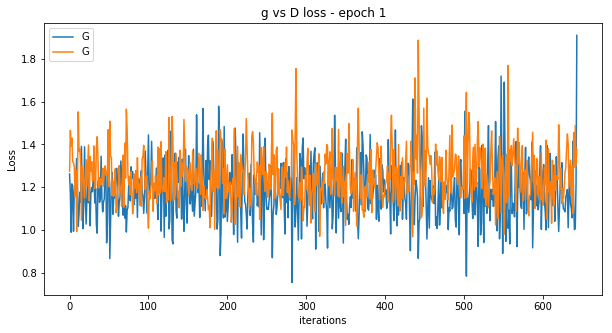

[3/20][322/644] Loss_D: 1.1711 Loss_G: 1.0582 D(x): 0.5298 D(G(z)): 0.3727 / 0.3380
[3/20][644/644] Loss_D: 1.7190 Loss_G: 1.5492 D(x): 0.3114 D(G(z)): 0.4335 / 0.2046


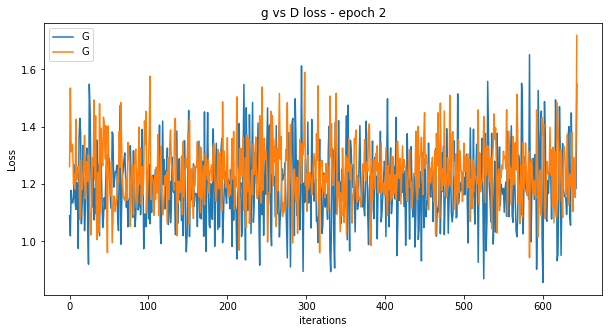

[4/20][322/644] Loss_D: 1.1457 Loss_G: 1.2567 D(x): 0.5104 D(G(z)): 0.3394 / 0.2797
[4/20][644/644] Loss_D: 0.9817 Loss_G: 1.6658 D(x): 0.5275 D(G(z)): 0.2625 / 0.1654


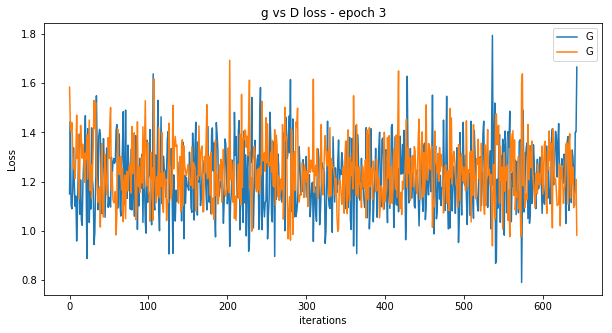

[5/20][322/644] Loss_D: 1.1663 Loss_G: 1.2557 D(x): 0.5869 D(G(z)): 0.4189 / 0.2669
[5/20][644/644] Loss_D: 1.4539 Loss_G: 1.7187 D(x): 0.4162 D(G(z)): 0.3929 / 0.1530


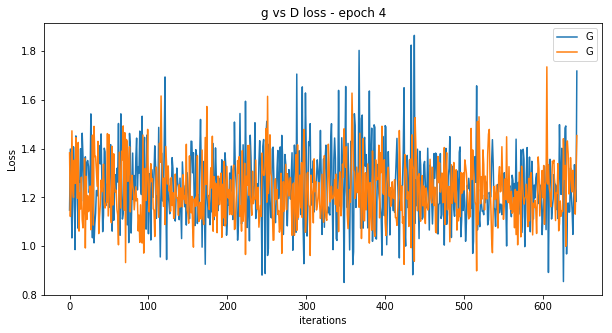

[6/20][322/644] Loss_D: 1.0904 Loss_G: 1.3666 D(x): 0.5371 D(G(z)): 0.3343 / 0.2417
[6/20][644/644] Loss_D: 1.3174 Loss_G: 1.9611 D(x): 0.4116 D(G(z)): 0.3349 / 0.1164


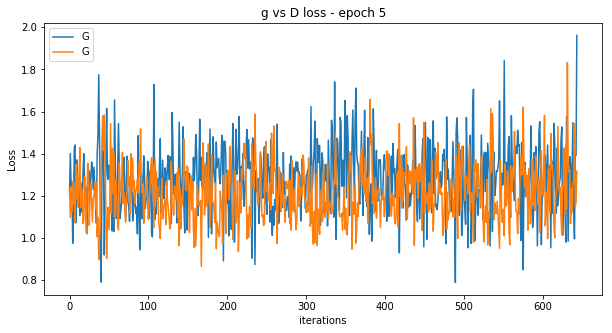

[7/20][322/644] Loss_D: 1.3537 Loss_G: 1.1356 D(x): 0.4412 D(G(z)): 0.3701 / 0.3196
[7/20][644/644] Loss_D: 1.3777 Loss_G: 1.4585 D(x): 0.3287 D(G(z)): 0.2431 / 0.2120


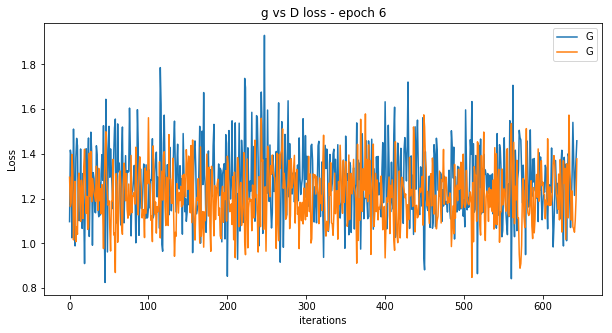

In [ ]:
for epoch in range(epochs):
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        # maximize log(D(x)) + log(1 - D(G(z)))
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)
        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item() # [0, 1]
        
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()
        
        # maximize log(D(G(z)))
        netG.zero_grad()
        labels.fill_(real_label)
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)
        
        

In [70]:
print (">> average EPOCH duration = ", np.mean(epoch_time))

>> average EPOCH duration =  143.42014923095704


# Generation example

**WARNING,THIS CONTAINS IMAGES THAT MAY HURT THE SENSITIVITY OF SOME PEOPLE**

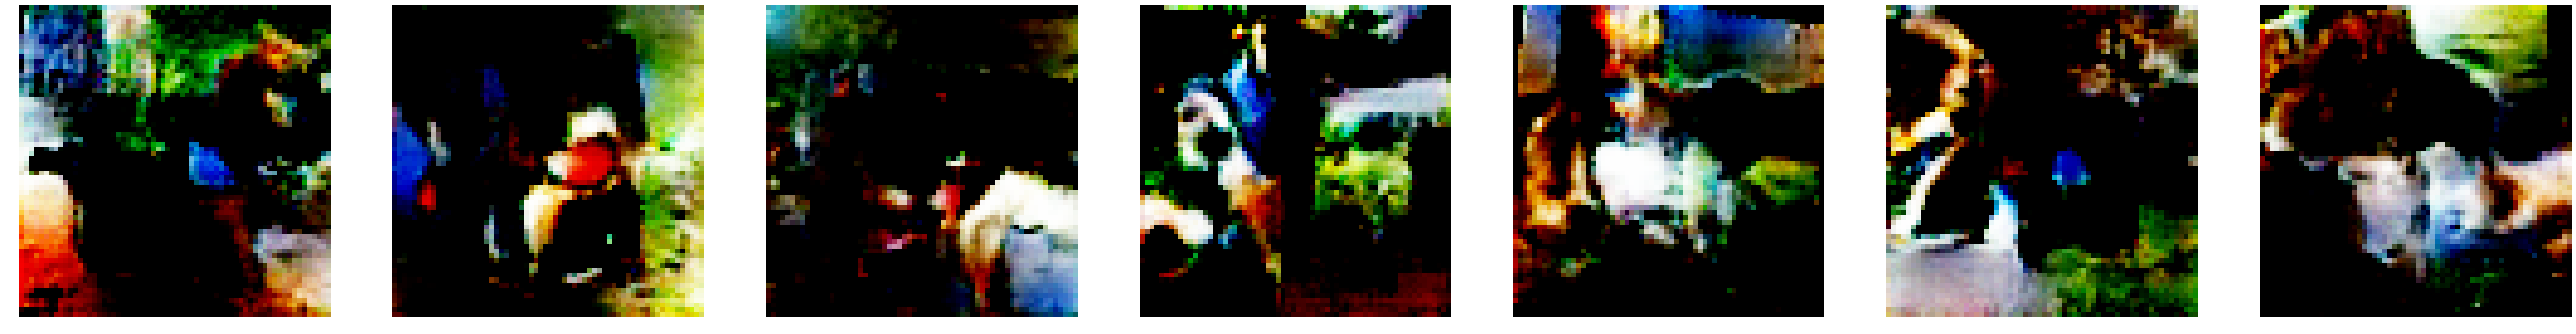

In [73]:
show_generated_img(7)
# One-sided label smoothing
# https://towardsdatascience.com/gan-ways-to-improve-gan-performance-acf37f9f59b

In [ ]:
torch.save(netG.state_dict(), 'generator.pth')
torch.save(netD.state_dict(), 'discriminator.pth')

Base code from [Demo MiFID metric for Dog image generation comp](https://www.kaggle.com/wendykan/demo-mifid-metric-for-dog-image-generation-comp)

# References

- [DCGAN baseline](https://www.kaggle.com/artgor/dcgan-baseline) by Andrew
- [RaLSGAN dogs](https://www.kaggle.com/speedwagon/ralsgan-dogs) by Vlad
- [GAN dogs starter](https://www.kaggle.com/wendykan/gan-dogs-starter)
- [GitHub Achronus generative_adversarial_networks](https://github.com/Achronus/Machine-Learning-101/blob/master/coding_templates_and_data_files/computer_vision/2.%20generative_adversarial_networks.py)
- [It’s Training Cats and Dogs: NVIDIA Research Uses AI to Turn Cats Into Dogs, Lions and Tigers, Too](https://blogs.nvidia.com/blog/2018/04/15/nvidia-research-image-translation/)
- [A Beginner's Guide to Generative Adversarial Networks (GANs)](https://skymind.ai/wiki/generative-adversarial-network-gan)

<br>
<br>

----

## I think I'll keep updating this, I like this comp and GANs :D
### btw, If you want to create a x5 team, I'm in :p

![](https://i.imgflip.com/34fezh.jpg)

